# Etude complète d'un modèle de prédiction de survie sur le titanic
## 1) Créer un train et un test Set, obtenir une première évaluation
## 2) Avec GridSearch, trouver les meilleurs hyper-paramètres
## 3) Tracer les courbes pour vérifier s'il y a un overfitting ou underfitting
## 4) Learning_curve pour savoir si on peut améliorer la performance du modèle

## 1) Créer un train et un test Set, obtenir une première évaluation

In [1]:
#On commence par importer le dataset du titanic à l'aide de pandas
import pandas as pd
titanic = pd.read_excel('../Datasets/titanic.xls')
#On vérifie que l'importation est bien réussie
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
#On supprime les valeurs NaN et on transforme les informations textuels en infos numériques
titanic = titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

,survived,pclass,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,0,1,1,2.0000
3,0,1,0,30.0000
4,0,1,1,25.0000


Score : 0.8


Text(0.5, 0.92, 'Estimated Survival')

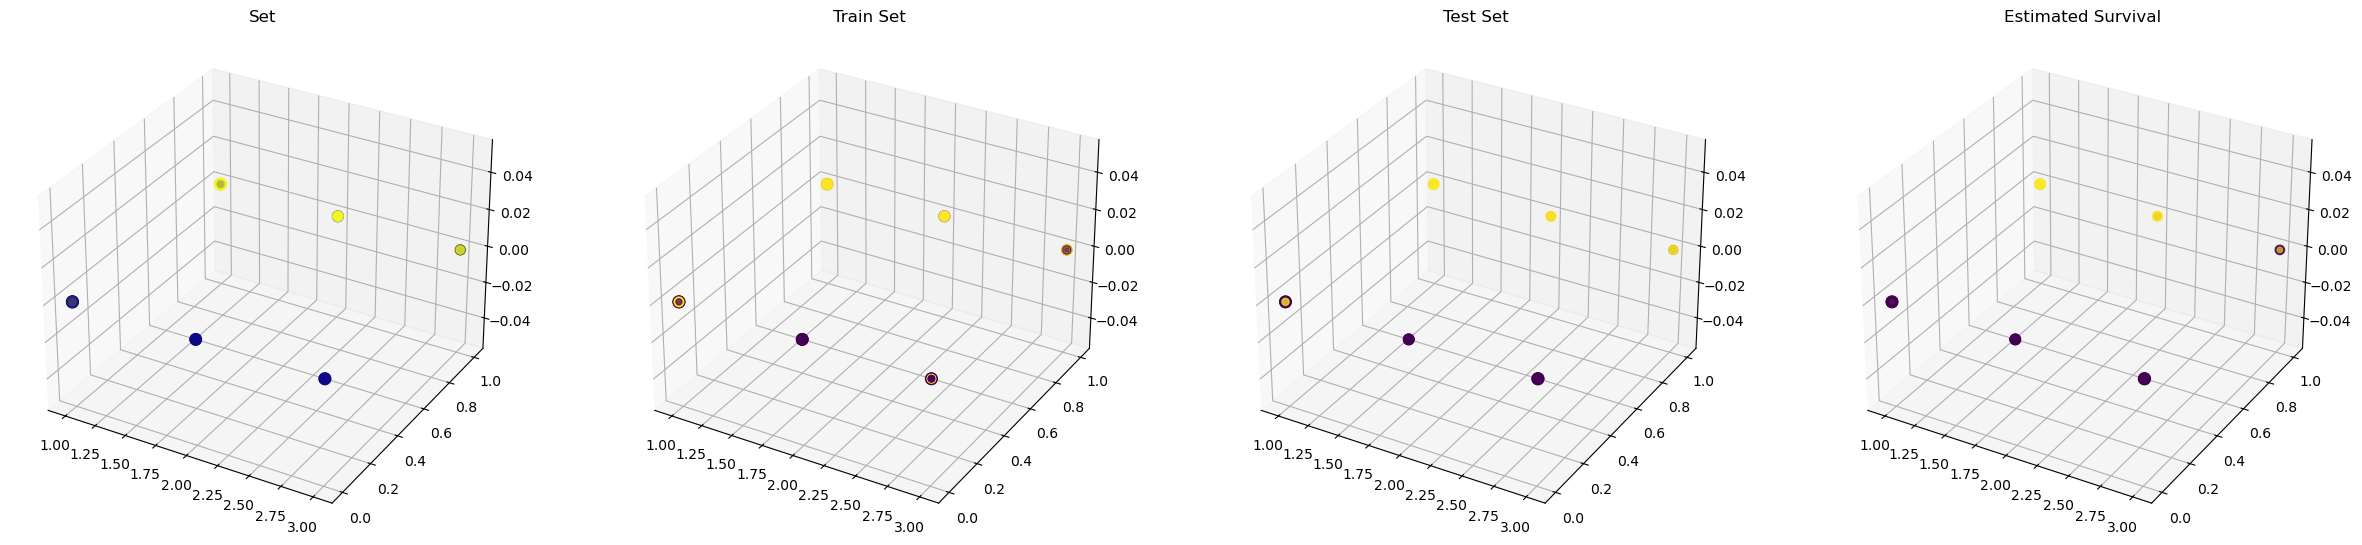

In [3]:
# On crée les test et train sets
y = titanic['survived']
X = titanic.drop(['survived'],axis=1)
# Ici notre étiquette est la survie du passager ou non (0 ou 1), il s'agira donc d'annoter les observations en fonction des caractéristiques pclass, age, sex
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Score : "+str(knn.score(X_test,y_test)))
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Création de la grille de subplots 3D
plt.figure(figsize=(30, 10))
plt.subplot(141, projection='3d')  # 1 ligne, 4 colonnes, subplot 1
plt.scatter(X['pclass'], X['sex'],X['age'],c=y, cmap='plasma',linewidths=1, alpha=0.5)
plt.title("Set")
plt.subplot(142, projection='3d')  # 1 ligne, 4 colonnes, subplot 2
plt.scatter(X_train['pclass'], X_train['sex'],X_train['age'],c=y_train)
plt.title("Train Set")
plt.subplot(143, projection='3d')  # 1 ligne, 4 colonnes, subplot 3
plt.scatter(X_test['pclass'], X_test['sex'],X_test['age'],c=y_test)
plt.title("Test Set")
plt.subplot(144, projection='3d')  # 1 ligne, 4 colonnes, subplot 3
plt.scatter(X_test['pclass'], X_test['sex'],X_test['age'],c=y_pred)
plt.title("Estimated Survival")

In [4]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[116,  22],
       [ 20,  52]])

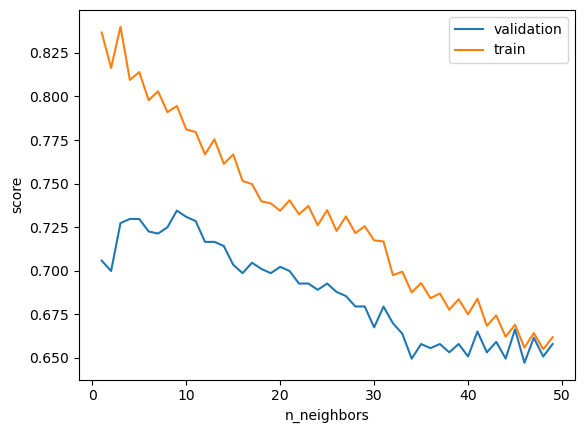

In [5]:
from sklearn.model_selection import learning_curve
import numpy as np
#On fait de la crossvalidation
from sklearn.model_selection import validation_curve
knn = KNeighborsClassifier()
k = np.arange(1,50)
train_scores, val_scores = validation_curve(knn,X_train,y_train,param_name="n_neighbors",param_range=k,cv=5)
plt.plot(k,val_scores.mean(axis=1),label='validation')
plt.plot(k,train_scores.mean(axis=1),label='train')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

## 2) Avec GridSearch, trouver les meilleurs hyper-paramètres

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50),'metric':['euclidean','manhattan','minkowski'],'weights':['uniform','distance']}
grid = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.score(X_test,y_test)

0.8047619047619048

In [7]:
knn = grid.best_estimator_
knn.score(X_test,y_test)
confusion = confusion_matrix(y_test,knn.predict(X_test))
confusion

array([[119,  19],
       [ 22,  50]])

## 4) Learning_curve pour savoir si on peut améliorer la performance du modèle

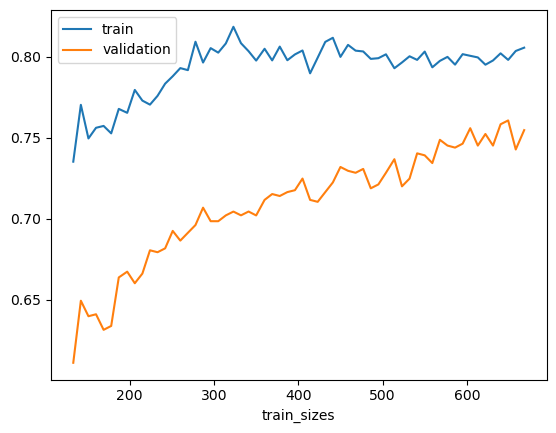

In [67]:
from sklearn.model_selection import learning_curve
N, train_scores, val_scores = learning_curve(knn,X_train,y_train,train_sizes=np.linspace(0.2,1,60))
plt.plot(N,train_scores.mean(axis=1),label='train')
plt.plot(N,val_scores.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [68]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

# Régression Logistique

Score : 0.8142857142857143


Text(0.5, 0.92, 'Estimated Survival')

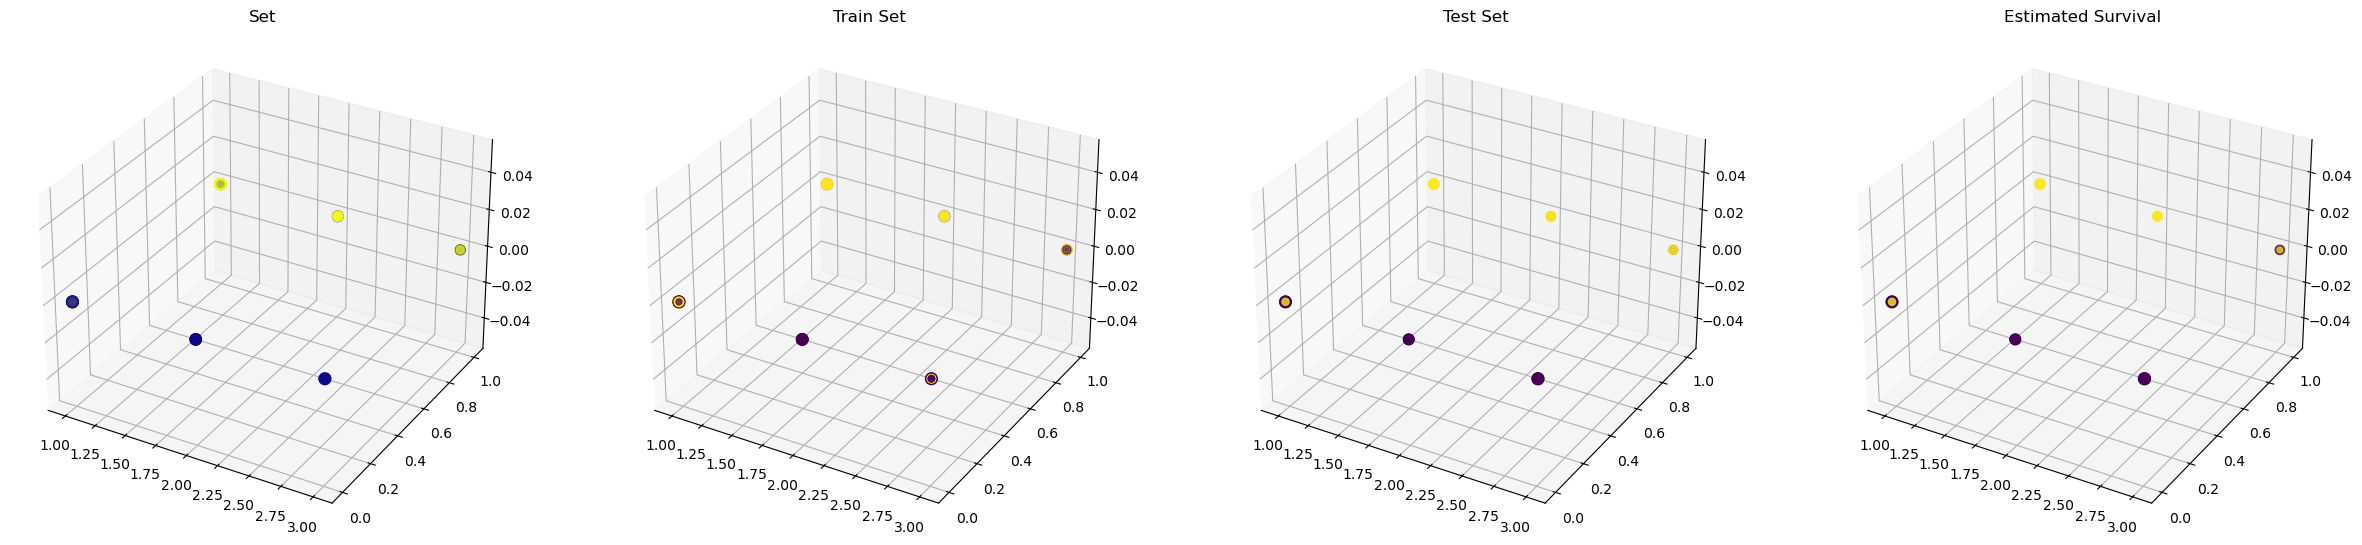

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)
from sklearn.linear_model import LogisticRegression
Logregr = LogisticRegression()
Logregr.fit(X_train,y_train)
y_pred = Logregr.predict(X_test)
print("Score : "+str(Logregr.score(X_test,y_test)))
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Création de la grille de subplots 3D
plt.figure(figsize=(30, 10))
plt.subplot(141, projection='3d')  # 1 ligne, 4 colonnes, subplot 1
plt.scatter(X['pclass'], X['sex'],X['age'],c=y, cmap='plasma',linewidths=1, alpha=0.5)
plt.title("Set")
plt.subplot(142, projection='3d')  # 1 ligne, 4 colonnes, subplot 2
plt.scatter(X_train['pclass'], X_train['sex'],X_train['age'],c=y_train)
plt.title("Train Set")
plt.subplot(143, projection='3d')  # 1 ligne, 4 colonnes, subplot 3
plt.scatter(X_test['pclass'], X_test['sex'],X_test['age'],c=y_test)
plt.title("Test Set")
plt.subplot(144, projection='3d')  # 1 ligne, 4 colonnes, subplot 3
plt.scatter(X_test['pclass'], X_test['sex'],X_test['age'],c=y_pred)
plt.title("Estimated Survival")